In [86]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [87]:
facebook_data_set = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv')

print(facebook_data_set.head())

   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  Column1  Column2  Column3  Column4  
0           0      NaN      NaN      NaN      NaN  
1           0      NaN      Na

In [88]:
#There are columns with no information such as column 1-4 which I removed from table
facebook_data_set = facebook_data_set.drop('Column1', axis=1)
facebook_data_set = facebook_data_set.drop('Column2', axis=1)
facebook_data_set = facebook_data_set.drop('Column3', axis=1)
facebook_data_set = facebook_data_set.drop('Column4', axis=1)

print(facebook_data_set)

      status_id status_type status_published  num_reactions  num_comments  \
0             1       video   4/22/2018 6:00            529           512   
1             2       photo  4/21/2018 22:45            150             0   
2             3       video   4/21/2018 6:17            227           236   
3             4       photo   4/21/2018 2:29            111             0   
4             5       photo   4/18/2018 3:22            213             0   
...         ...         ...              ...            ...           ...   
7045       7046       photo   9/24/2016 2:58             89             0   
7046       7047       photo  9/23/2016 11:19             16             0   
7047       7048       photo  9/21/2016 23:03              2             0   
7048       7049       photo   9/20/2016 0:43            351            12   
7049       7050       photo  9/10/2016 10:30             17             0   

      num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0 

In [89]:
#Drop NA/NULL values
facebook_data_set = facebook_data_set.dropna(axis='columns')
facebook_data_set = facebook_data_set.dropna(axis='rows')

In [90]:
#Check for Duplicate Entries and Remove Them. 
#There are none as shown in Output.
facebook_2 = facebook_data_set[facebook_data_set.duplicated()]
print(facebook_2)


Empty DataFrame
Columns: [status_id, status_type, status_published, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys]
Index: []


In [91]:
#Firstly lets take a look at our summary of the DataFrame
facebook_data_set.info()

#Check for missing values in dataset
facebook_data_set.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [92]:
#Transform Categorical Attributes and Apply Normalization to Data


# Checking the Different Categorical Values for Uniqueness

#Approximately a unique identifier for each of the instances. 
#Thus this is not a variable that we can use.
print(facebook_data_set['status_id'].unique())
print(len(facebook_data_set['status_id'].unique()))

#We will use status_type for target variable
print(facebook_data_set['status_type'].unique())
print(len(facebook_data_set['status_type'].unique()))

#Approximately a unique identifier for each of the instances. 
#Thus this is not a variable that we can use.
print(facebook_data_set['status_published'].unique())
print(len(facebook_data_set['status_published'].unique()))


[   1    2    3 ... 7048 7049 7050]
7050
['video' 'photo' 'link' 'status']
4
['4/22/2018 6:00' '4/21/2018 22:45' '4/21/2018 6:17' ... '9/21/2016 23:03'
 '9/20/2016 0:43' '9/10/2016 10:30']
6913


In [93]:
facebook_data_set.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [94]:
facebook_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [95]:
print(facebook_data_set.head())

  status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0       video            529           512         262        432         92   
1       photo            150             0           0        150          0   
2       video            227           236          57        204         21   
3       photo            111             0           0        111          0   
4       photo            213             0           0        204          9   

   num_wows  num_hahas  num_sads  num_angrys  
0         3          1         1           0  
1         0          0         0           0  
2         1          1         0           0  
3         0          0         0           0  
4         0          0         0           0  


In [96]:
X = facebook_data_set  # feature variable
y = facebook_data_set['status_type']  # target variable

In [97]:
#Convert Categorical Variables to Integers

LabelEncoder = LabelEncoder()

X['status_type'] = LabelEncoder.fit_transform(X['status_type'])

y = LabelEncoder.transform(y)

print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB
None


In [98]:
column = X.columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=[column])
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [99]:
#Start off with Cluster N=2
kmeans_cluster = KMeans(n_clusters=2, random_state=0)
print(kmeans_cluster.fit(X))

print(kmeans_cluster.cluster_centers_)
# This is not good model the inertia is too high.
# The lesser the inertia, the better the model is performing 
#So, this is not a good model fit to the data.
print(kmeans_cluster.inertia_)

KMeans(n_clusters=2, random_state=0)
[[3.28506857e-01 3.90710874e-02 7.54854864e-04 7.53667113e-04
  3.85438884e-02 2.17448568e-03 2.43721364e-03 1.20039760e-03
  2.75348016e-03 1.45313276e-03]
 [9.54921576e-01 6.46330441e-02 2.67028654e-02 2.93171709e-02
  5.71231462e-02 4.71007076e-02 8.18581889e-03 9.65207685e-03
  8.04219428e-03 7.19501847e-03]]
237.75726404419646


In [100]:

label = kmeans_cluster.labels_
label_eval = sum(y == label)
print("%d out of 7050 samples were correctly labelled." % (label_eval))
print('Accuracy score: {0:0.2f}'. format(label_eval/float(y.size)))

#Very Weak Accuracy Score - Not good 

63 out of 7050 samples were correctly labelled.
Accuracy score: 0.01


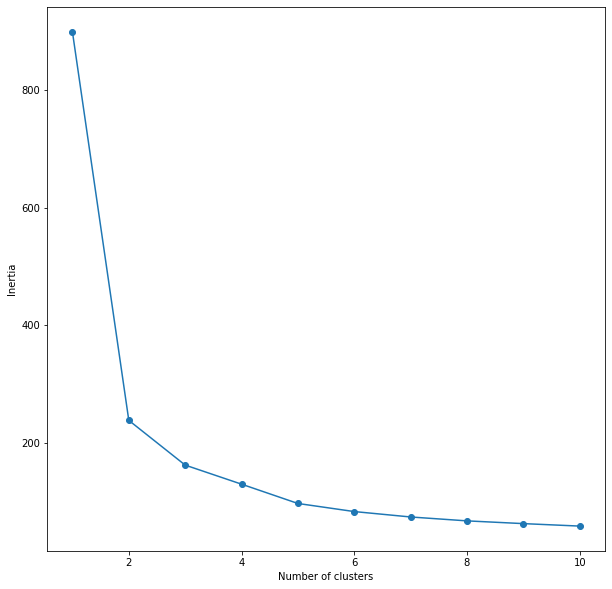

In [101]:
#ELBOW METHOD
#graph shows that k = 2 is good, however we have already noticed that it has a weak classification accuracy 
#Will attempt with other clusters (N=3, N=4)
SSE = []
for cluster in range(1, 11):
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster': range(1, 11), 'SSE': SSE})
plt.figure(figsize=(10, 10))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [102]:
kmeans_cluster = KMeans(n_clusters=3, random_state=0)
kmeans_cluster.fit(X)

label = kmeans_cluster.labels_
label_eval = sum (y==label)

print("%d out of 7050 samples were correctly labelled." % (label_eval))
print('Accuracy score: {0:0.2f}'. format(label_eval/float(y.size)))

138 out of 7050 samples were correctly labelled.
Accuracy score: 0.02


In [103]:
kmeans_cluster = KMeans(n_clusters=4, random_state=0)
kmeans_cluster.fit(X)
# check how many of the samples were correctly labeled
label = kmeans_cluster.labels_
label_eval = sum(y == label)
print("%d out of 7050 samples were correctly labelled." % (label_eval))
print('Accuracy score: {0:0.2f}'. format(label_eval/float(y.size)))

#Therefore Cluster 4 is the best with highest accuracy score and most correctly labelled

4340 out of 7050 samples were correctly labelled.
Accuracy score: 0.62
